In [2]:
#Basic imports for DataScience
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Step 1. Pre-processing

In [7]:
cars = pd.read_csv("datasets/cars.csv") #For regression problems

In [8]:
ibm = pd.read_csv("datasets/IBM.csv") #For Logistic Regression

In [9]:
penguins = pd.read_csv("datasets/penguins.csv") #Classification problems

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [13]:
#exploring for missingnness
cars.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

<AxesSubplot:>

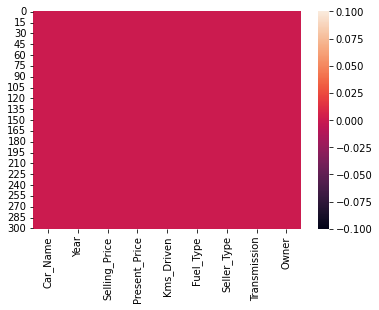

In [14]:
sns.heatmap(cars.isnull())

In [22]:
penguins.drop('sex', axis=1, inplace=True) #drops the variable with too many missing

In [31]:
penguins = penguins.loc[~penguins['flipper_length_mm'].isna()] 

In [32]:
penguins.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
dtype: int64

In [35]:
cars.corr()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
Year,1.000000,0.236141,-0.047584,-0.524342,-0.182104
Selling_Price,0.236141,1.000000,0.878983,0.029187,-0.088344
Present_Price,-0.047584,0.878983,1.000000,0.203647,0.008057
Kms_Driven,-0.524342,0.029187,0.203647,1.000000,0.089216
Owner,-0.182104,-0.088344,0.008057,0.089216,1.000000


<AxesSubplot:>

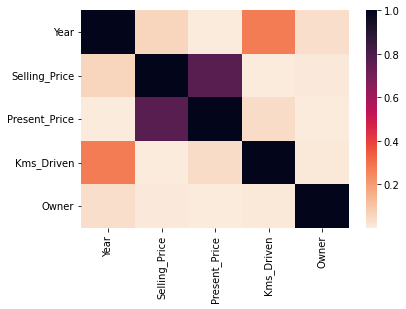

In [38]:
sns.heatmap(np.square(cars.corr()), cmap=sns.cm.rocket_r)

In [40]:
cars_num = cars[['Present_Price', 'Year']]

In [50]:
catvars = cars.select_dtypes(exclude='number').columns

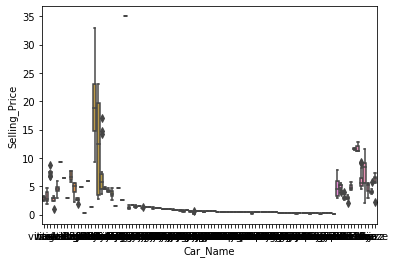

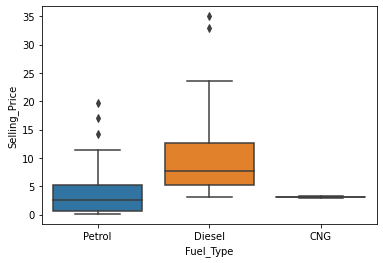

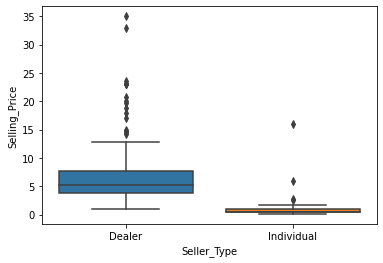

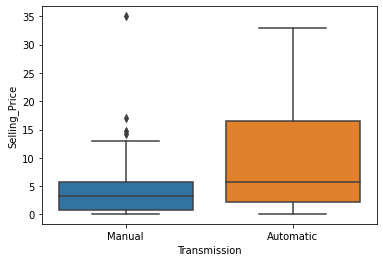

In [51]:
for var in catvars:
    sns.boxplot(data=cars, y='Selling_Price', x=var)
    plt.show()

In [52]:
cars_cat = cars[['Transmission', 'Seller_Type', 'Fuel_Type']]

In [112]:
cars_final = pd.concat([cars_num, cars_cat, cars[['Selling_Price']]], axis=1)

In [113]:
cars_final

,Present_Price,Year,Transmission,Seller_Type,Fuel_Type,Selling_Price
0,5.59,2014,Manual,Dealer,Petrol,3.35
1,9.54,2013,Manual,Dealer,Diesel,4.75
2,9.85,2017,Manual,Dealer,Petrol,7.25
3,4.15,2011,Manual,Dealer,Petrol,2.85
4,6.87,2014,Manual,Dealer,Diesel,4.60
...,...,...,...,...,...,...
296,11.60,2016,Manual,Dealer,Diesel,9.50
297,5.90,2015,Manual,Dealer,Petrol,4.00
298,11.00,2009,Manual,Dealer,Petrol,3.35
299,12.50,2017,Manual,Dealer,Diesel,11.50


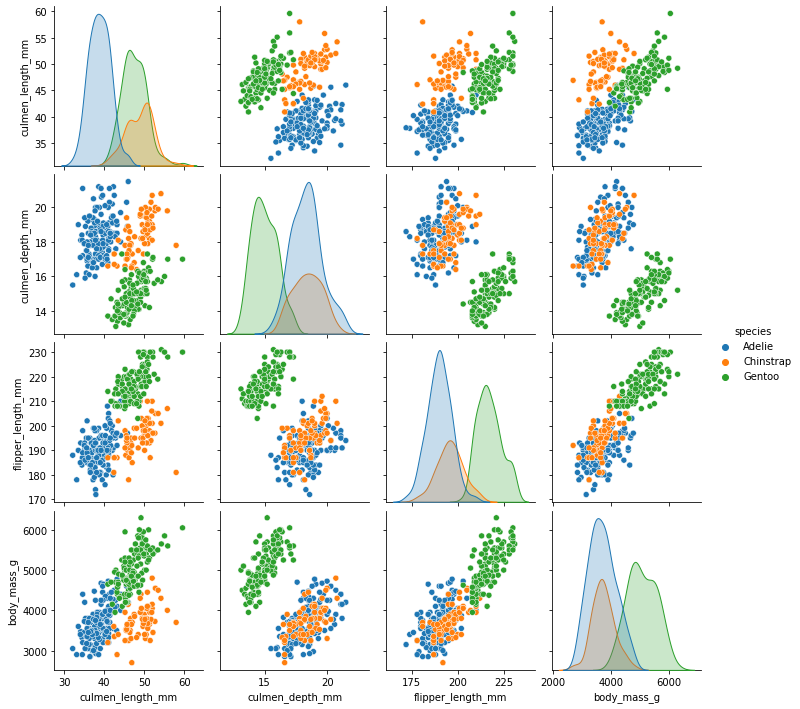

In [60]:
sns.pairplot(penguins, hue='species')

In [63]:
#penguins.columns
penguins_num = penguins[['flipper_length_mm', 'culmen_depth_mm', 'culmen_length_mm']]

<AxesSubplot:xlabel='island', ylabel='count'>

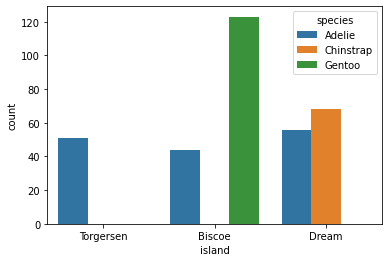

In [66]:
sns.countplot(data=penguins, x='island', hue='species')

In [67]:
penguins_cat = penguins[['island']]

In [69]:
penguins = pd.concat([penguins_num, penguins_cat, penguins[['species']]], axis=1)

### Dummy Variables

In [120]:
cars = pd.get_dummies(cars_final, drop_first=True)

In [121]:
dummies = pd.get_dummies(penguins.drop('species', axis=1), drop_first=True)

In [122]:
penguins = pd.concat([dummies, penguins[['species']]], axis=1)

In [123]:
penguins

,flipper_length_mm,culmen_depth_mm,culmen_length_mm,island_Dream,island_Torgersen,species
0,181.0,18.7,39.1,0,1,Adelie
1,186.0,17.4,39.5,0,1,Adelie
2,195.0,18.0,40.3,0,1,Adelie
4,193.0,19.3,36.7,0,1,Adelie
5,190.0,20.6,39.3,0,1,Adelie
...,...,...,...,...,...,...
338,214.0,13.7,47.2,0,0,Gentoo
340,215.0,14.3,46.8,0,0,Gentoo
341,222.0,15.7,50.4,0,0,Gentoo
342,212.0,14.8,45.2,0,0,Gentoo


# Scaling

In [140]:
from sklearn.preprocessing import StandardScaler

In [141]:
scaler = StandardScaler()

In [142]:
scaler.fit(cars.drop('Selling_Price', axis=1))

StandardScaler()

In [143]:
cars_scaled = scaler.transform(cars.drop('Selling_Price', axis=1))

In [144]:
cars_scaled = pd.DataFrame(cars_scaled)

In [145]:
cars_scaled.columns = cars.drop('Selling_Price', axis=1).columns

In [146]:
cars_final = pd.concat([cars_scaled, cars[['Selling_Price']]], axis=1)

In [147]:
cars_final

,Present_Price,Year,Transmission_Manual,Seller_Type_Individual,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_Price
0,-0.236215,0.128897,0.39148,-0.737285,-0.498962,0.509327,3.35
1,0.221505,-0.217514,0.39148,-0.737285,2.004162,-1.963374,4.75
2,0.257427,1.168129,0.39148,-0.737285,-0.498962,0.509327,7.25
3,-0.403079,-0.910335,0.39148,-0.737285,-0.498962,0.509327,2.85
4,-0.087890,0.128897,0.39148,-0.737285,2.004162,-1.963374,4.60
...,...,...,...,...,...,...,...
296,0.460214,0.821718,0.39148,-0.737285,2.004162,-1.963374,9.50
297,-0.200292,0.475308,0.39148,-0.737285,-0.498962,0.509327,4.00
298,0.390687,-1.603156,0.39148,-0.737285,-0.498962,0.509327,3.35
299,0.564504,1.168129,0.39148,-0.737285,2.004162,-1.963374,11.50


# Splitting Data

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
carsl = cars['Selling_Price']
carsf = cars.drop('Selling_Price', axis=1)

In [150]:
tr_fc, ts_fc, tr_lc, ts_lc = train_test_split(carsf, carsl, test_size=0.2, random_state=101)

# Linear Regression

In [151]:
from sklearn.linear_model import LinearRegression #algo

In [152]:
mlr = LinearRegression() # initialize

In [153]:
mlr.fit(tr_fc, tr_lc) # train

LinearRegression()

In [154]:
predicted_car_prices = mlr.predict(ts_fc) #predict

In [155]:
predicted_car_prices[0:5]

array([-0.85383975,  7.65680268,  7.84693295,  8.52773398, -0.05977228])

In [156]:
ts_lc[0:5]

176    0.35
253    7.20
12     7.50
16     7.25
193    0.20
Name: Selling_Price, dtype: float64

# Model Evaluation

/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Selling_Price'>

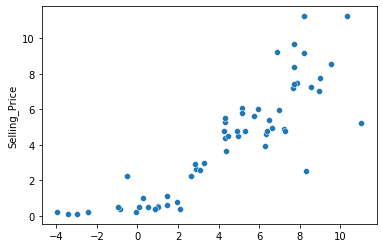

In [157]:
sns.scatterplot(predicted_car_prices, ts_lc)

In [158]:
from sklearn.metrics import mean_squared_error

In [159]:
mse = mean_squared_error(predicted_car_prices, ts_lc)

In [161]:
rmse = np.sqrt(mse)

In [162]:
rmse

1.8136509572110326

# Classification

In [163]:
penguins

,flipper_length_mm,culmen_depth_mm,culmen_length_mm,island_Dream,island_Torgersen,species
0,181.0,18.7,39.1,0,1,Adelie
1,186.0,17.4,39.5,0,1,Adelie
2,195.0,18.0,40.3,0,1,Adelie
4,193.0,19.3,36.7,0,1,Adelie
5,190.0,20.6,39.3,0,1,Adelie
...,...,...,...,...,...,...
338,214.0,13.7,47.2,0,0,Gentoo
340,215.0,14.3,46.8,0,0,Gentoo
341,222.0,15.7,50.4,0,0,Gentoo
342,212.0,14.8,45.2,0,0,Gentoo


In [164]:
# Decsion Tree

In [167]:
pen_train, pen_test, sp_train, sp_test = train_test_split(penguins.drop('species', axis=1), penguins['species'], test_size=0.2)

In [165]:
from sklearn.tree import DecisionTreeClassifier

In [166]:
dtc = DecisionTreeClassifier()

In [168]:
dtc.fit(pen_train, sp_train)

DecisionTreeClassifier()

In [169]:
pred_sp = dtc.predict(pen_test)

In [170]:
#Evaluation
from sklearn.metrics import confusion_matrix, classification_report

In [172]:
print(classification_report(pred_sp, sp_test))

              precision    recall  f1-score   support

      Adelie       0.97      1.00      0.98        32
   Chinstrap       1.00      0.94      0.97        16
      Gentoo       1.00      1.00      1.00        21

    accuracy                           0.99        69
   macro avg       0.99      0.98      0.98        69
weighted avg       0.99      0.99      0.99        69



In [173]:
print(confusion_matrix(pred_sp, sp_test))

[[32  0  0]
 [ 1 15  0]
 [ 0  0 21]]


In [175]:
pd.DataFrame({'predicted': pred_sp, 'Actual': sp_test})

,predicted,Actual
336,Gentoo,Gentoo
140,Adelie,Adelie
191,Chinstrap,Chinstrap
236,Gentoo,Gentoo
36,Adelie,Adelie
...,...,...
270,Gentoo,Gentoo
248,Gentoo,Gentoo
204,Chinstrap,Chinstrap
341,Gentoo,Gentoo


# Suppot Vector Classification

In [176]:
from sklearn.svm import SVC

In [177]:
vect = SVC()

In [178]:
vect.fit(pen_train, sp_train)

SVC()

In [179]:
predv_sp = vect.predict(pen_test)

In [180]:
print(classification_report(predv_sp, sp_test))

              precision    recall  f1-score   support

      Adelie       1.00      0.79      0.88        42
   Chinstrap       0.00      0.00      0.00         0
      Gentoo       1.00      0.78      0.88        27

    accuracy                           0.78        69
   macro avg       0.67      0.52      0.59        69
weighted avg       1.00      0.78      0.88        69



/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sikpe/opt/anaconda3/envs/cobra/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
print(confusion_matrix(predv_sp, sp_test))

[[33  9  0]
 [ 0  0  0]
 [ 0  6 21]]


In [182]:
pd.DataFrame({'predicted': predv_sp, 'Actual': sp_test})

,predicted,Actual
336,Gentoo,Gentoo
140,Adelie,Adelie
191,Gentoo,Chinstrap
236,Gentoo,Gentoo
36,Adelie,Adelie
...,...,...
270,Gentoo,Gentoo
248,Gentoo,Gentoo
204,Adelie,Chinstrap
341,Gentoo,Gentoo


In [183]:
# KNN

In [184]:
from sklearn.neighbors import KNeighborsClassifier

In [201]:
knn = KNeighborsClassifier(n_neighbors=17)

In [202]:
knn.fit(pen_train, sp_train)

KNeighborsClassifier(n_neighbors=17)

In [203]:
predk_sp = knn.predict(pen_test)

In [204]:
ç

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        34
   Chinstrap       0.87      1.00      0.93        13
      Gentoo       1.00      0.95      0.98        22

    accuracy                           0.97        69
   macro avg       0.96      0.98      0.96        69
weighted avg       0.97      0.97      0.97        69



In [206]:
print(confusion_matrix(predk_sp, sp_test))

[[33  1  0]
 [ 0 13  0]
 [ 0  1 21]]


In [207]:
pd.DataFrame({'predicted': predk_sp, 'Actual': sp_test})

,predicted,Actual
336,Gentoo,Gentoo
140,Adelie,Adelie
191,Chinstrap,Chinstrap
236,Gentoo,Gentoo
36,Adelie,Adelie
...,...,...
270,Gentoo,Gentoo
248,Gentoo,Gentoo
204,Chinstrap,Chinstrap
341,Gentoo,Gentoo
